In [596]:
import pandas as pd

In [597]:
df = pd.read_csv(r"C:\Users\nrmmw\Documents\Flatiron\dsc-pandas-series-and-dataframes\turnstile_180901.txt", 
                 dtype = str)
# dtype = str: Sets all the datatype to strings
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...
...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,05:00:00,REGULAR,0000005554,0000000348 ...
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,09:00:00,REGULAR,0000005554,0000000348 ...
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,13:00:00,REGULAR,0000005554,0000000348 ...
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,0000005554,0000000348 ...


In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   197625 non-null  object
 1   UNIT                                                                  197625 non-null  object
 2   SCP                                                                   197625 non-null  object
 3   STATION                                                               197625 non-null  object
 4   LINENAME                                                              197625 non-null  object
 5   DIVISION                                                              197625 non-null  object
 6   DATE                                                                  197625 non-null  objec

.map() is used to transform values so that they follow a desired format

.map() is used on a Pandas series with a dictionary of values you want to use to replace other values

In [599]:
df['DIVISION'].value_counts()
# .value_counts() is used to 
# count the number of unique values in a column

IRT    72198
IND    69274
BMT    41727
PTH    12788
SRT     1386
RIT      252
Name: DIVISION, dtype: int64

## .map()
Imagine we want to replace the above abbreviations with their respective full names. Store it in a dictionary with their full names as above as a dictionary as below:

Once done, call the `.map()` method to replace the panda Series of abbreviations with their full names

In [600]:
division_mapping = {
    'IRT': 'Interborough Rapid Transit Company',
    'IND': 'Independent Subway System',
    'BMT': 'Brooklyn-Manhattan Transit Corporation',
    'PTH': 'Port Authority Trans-Hudson (PATH)',
    'SRT': 'Staten Island Rapid Transport',
    'RIT': 'Roosevelt Island Tram'
}

In [601]:
df["DIVISION"].map(division_mapping)

0         Brooklyn-Manhattan Transit Corporation
1         Brooklyn-Manhattan Transit Corporation
2         Brooklyn-Manhattan Transit Corporation
3         Brooklyn-Manhattan Transit Corporation
4         Brooklyn-Manhattan Transit Corporation
                           ...                  
197620                     Roosevelt Island Tram
197621                     Roosevelt Island Tram
197622                     Roosevelt Island Tram
197623                     Roosevelt Island Tram
197624                     Roosevelt Island Tram
Name: DIVISION, Length: 197625, dtype: object

In [602]:
df['DIVISION'] = df['DIVISION'].map(division_mapping)
df['DIVISION'].value_counts()

Interborough Rapid Transit Company        72198
Independent Subway System                 69274
Brooklyn-Manhattan Transit Corporation    41727
Port Authority Trans-Hudson (PATH)        12788
Staten Island Rapid Transport              1386
Roosevelt Island Tram                       252
Name: DIVISION, dtype: int64

**.map() can also be used to pass in a function.**

In [603]:
df['LINENAME'].value_counts()

1        24092
6        11263
7         9562
F         7146
25        6881
         ...  
ACG        210
S          210
ND         209
S2345      168
23ACE      168
Name: LINENAME, Length: 113, dtype: int64

Say we want ot see if there is the letter `N` in the linename. This can be written in a function

In [604]:
def contains_n(text):
    if 'N' in text:
        return True
    else:
        return False

In [605]:
# use .map() to pass the function
df['LINENAME'].map(contains_n)

0          True
1          True
2          True
3          True
4          True
          ...  
197620    False
197621    False
197622    False
197623    False
197624    False
Name: LINENAME, Length: 197625, dtype: bool

Note that for a pandas Series, the `.apply()` method can be used interchangeably with the `.map()` method when a function is provided (with somewhat different implementations "under the hood"):

In [606]:
# Creating a new col that shows if the line is on the N-Line
df['On_N_Line'] = df['LINENAME'].map(contains_n)

In [607]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,05:00:00,REGULAR,0000005554,0000000348 ...,False
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,09:00:00,REGULAR,0000005554,0000000348 ...,False
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,13:00:00,REGULAR,0000005554,0000000348 ...,False
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,17:00:00,REGULAR,0000005554,0000000348 ...,False


In [608]:
df['On_N_Line'].value_counts(normalize = True)
# normalize(True) returns the value_counts but in percentage form

False    0.870441
True     0.129559
Name: On_N_Line, dtype: float64

## Transformin Columns

In [609]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'On_N_Line'],
      dtype='object')

In [610]:
# Remove whitespaces
# All the following do the same job

#[col.strip() for col in df.columns]
#df.columns.str.strip()
df.columns.map(lambda col: col.strip())

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'On_N_Line'],
      dtype='object')

In [611]:
# To make the changes permanent,
# you will need to call df.columns again
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'On_N_Line'],
      dtype='object')

In [612]:
# Renaming columns
df.rename(columns = {'C/A': 'Control Area'}, inplace = True)
# inplace = True: ensures that the changes appear in the dataframe

In [613]:
df

,Control Area,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,05:00:00,REGULAR,0000005554,0000000348 ...,False
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,09:00:00,REGULAR,0000005554,0000000348 ...,False
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,13:00:00,REGULAR,0000005554,0000000348 ...,False
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,17:00:00,REGULAR,0000005554,0000000348 ...,False


In [614]:
# Dropping Columns
# Assume we don't need the DESC column
df.drop('DESC', axis =1)
#axis =1: ensure we are dropping columns and not rows
# Defaultly, .drop() drops rows (axis = 0)

,Control Area,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,00:00:00,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,04:00:00,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,08:00:00,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,12:00:00,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,16:00:00,0006736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,05:00:00,0000005554,0000000348 ...,False
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,09:00:00,0000005554,0000000348 ...,False
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,13:00:00,0000005554,0000000348 ...,False
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,17:00:00,0000005554,0000000348 ...,False


In [615]:
#Permanently drop the column
df = df.drop('DESC', axis = 1)

In [616]:
df.head()

,Control Area,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,00:00:00,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,04:00:00,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,08:00:00,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,12:00:00,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08/25/2018,16:00:00,0006736349,0002283384 ...,True


**Let's try changing the datatypes of the columns**

In [617]:
# See all columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Control Area  197625 non-null  object
 1   UNIT          197625 non-null  object
 2   SCP           197625 non-null  object
 3   STATION       197625 non-null  object
 4   LINENAME      197625 non-null  object
 5   DIVISION      197625 non-null  object
 6   DATE          197625 non-null  object
 7   TIME          197625 non-null  object
 8   ENTRIES       197625 non-null  object
 9   EXITS         197625 non-null  object
 10  On_N_Line     197625 non-null  bool  
dtypes: bool(1), object(10)
memory usage: 15.3+ MB


In [618]:
#To check for a single column only
print(df['ENTRIES'].dtype)

object


In [619]:
df['ENTRIES']

0         0006736067
1         0006736087
2         0006736105
3         0006736180
4         0006736349
             ...    
197620    0000005554
197621    0000005554
197622    0000005554
197623    0000005554
197624    0000005554
Name: ENTRIES, Length: 197625, dtype: object

In [620]:
# Let us change the above into integers
df['ENTRIES'].astype(int)

0         6736067
1         6736087
2         6736105
3         6736180
4         6736349
           ...   
197620       5554
197621       5554
197622       5554
197623       5554
197624       5554
Name: ENTRIES, Length: 197625, dtype: int32

In [621]:
# Make the changes permanent
df['ENTRIES'] = df['ENTRIES'].astype(int)

In [622]:
df['ENTRIES'].dtype

dtype('int32')

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Control Area  197625 non-null  object
 1   UNIT          197625 non-null  object
 2   SCP           197625 non-null  object
 3   STATION       197625 non-null  object
 4   LINENAME      197625 non-null  object
 5   DIVISION      197625 non-null  object
 6   DATE          197625 non-null  object
 7   TIME          197625 non-null  object
 8   ENTRIES       197625 non-null  int32 
 9   EXITS         197625 non-null  object
 10  On_N_Line     197625 non-null  bool  
dtypes: bool(1), int32(1), object(9)
memory usage: 14.5+ MB


Attempting to convert a string column to a numeric type will bring an error

We can also have date and datetime objects. Let us check the 'DATE' column

In [624]:
df['DATE'].head()

0    08/25/2018
1    08/25/2018
2    08/25/2018
3    08/25/2018
4    08/25/2018
Name: DATE, dtype: object

In [625]:
# To convert an objct to a date column using pd.to_datetime()

pd.to_datetime(df['DATE']).head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: DATE, dtype: datetime64[ns]

In [626]:
# Sometimes the above won't work and we will need
# to explicitly pass the argument
df['DATE'][0]
#format = mm/dd/yyyy

'08/25/2018'

In [627]:
pd.to_datetime(df['DATE'], format = "%m/%d/%Y").head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: DATE, dtype: datetime64[ns]

In [628]:
# Let's make the change permanent
df['DATE'] = pd.to_datetime(df['DATE'], format = "%m/%d/%Y")

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Control Area  197625 non-null  object        
 1   UNIT          197625 non-null  object        
 2   SCP           197625 non-null  object        
 3   STATION       197625 non-null  object        
 4   LINENAME      197625 non-null  object        
 5   DIVISION      197625 non-null  object        
 6   DATE          197625 non-null  datetime64[ns]
 7   TIME          197625 non-null  object        
 8   ENTRIES       197625 non-null  int32         
 9   EXITS         197625 non-null  object        
 10  On_N_Line     197625 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(1), object(8)
memory usage: 14.5+ MB


**Using DateTime methods**

In [630]:
# Creating a sample of date column
date_sample = df['DATE'].sample(7)

In [631]:
date_sample

171460   2018-08-26
121912   2018-08-27
186904   2018-08-30
71900    2018-08-26
1718     2018-08-30
111802   2018-08-29
34368    2018-08-27
Name: DATE, dtype: datetime64[ns]

In [632]:
# .dt: stores all the pandas datetime methods
# Only works for columns with dateTime datatype
date_sample.dt.day_name()

171460       Sunday
121912       Monday
186904     Thursday
71900        Sunday
1718       Thursday
111802    Wednesday
34368        Monday
Name: DATE, dtype: object

In [633]:
# Rounds off to the nearest seven days
date_sample.dt.round('7D')

171460   2018-08-23
121912   2018-08-30
186904   2018-08-30
71900    2018-08-23
1718     2018-08-30
111802   2018-08-30
34368    2018-08-30
Name: DATE, dtype: datetime64[ns]

In [634]:
# You can also set one of the cols as the index of the df
df = df.set_index('DATE')
df

,Control Area,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,ENTRIES,EXITS,On_N_Line
DATE,,,,,,,,,,
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,00:00:00,6736067,0002283184 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,04:00:00,6736087,0002283188 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08:00:00,6736105,0002283229 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,12:00:00,6736180,0002283314 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,16:00:00,6736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...
2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,05:00:00,5554,0000000348 ...,False
2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,09:00:00,5554,0000000348 ...,False
2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,13:00:00,5554,0000000348 ...,False


The date is now the index of the dataFrame.

Now lets return our idex back and the DATE column becomes a column

In [635]:
df = df.reset_index()
df

,DATE,Control Area,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,ENTRIES,EXITS,On_N_Line
0,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,00:00:00,6736067,0002283184 ...,True
1,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,04:00:00,6736087,0002283188 ...,True
2,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,08:00:00,6736105,0002283229 ...,True
3,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,12:00:00,6736180,0002283314 ...,True
4,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn-Manhattan Transit Corporation,16:00:00,6736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...
197620,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,05:00:00,5554,0000000348 ...,False
197621,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,09:00:00,5554,0000000348 ...,False
197622,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,13:00:00,5554,0000000348 ...,False
197623,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,17:00:00,5554,0000000348 ...,False


# Pandas Series and DataFrame Lab

In [636]:
df1 = pd.read_csv(r"C:\Users\nrmmw\Documents\Flatiron\dsc-pandas-series-and-dataframes-lab\turnstile_180901.txt")
df1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,5554,348


In [637]:
df1.shape

(197625, 11)

In [638]:
df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [639]:
# Rename all the columns to lower case:
df1.columns = df1.columns.str.lower().str.strip()
df1.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [640]:
df1.head(3)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229


In [641]:
# Change the index to 'linename'
df1 = df1.set_index('linename')
df1

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348


In [642]:
# Reset the index:
df1 = df1.reset_index()
df1

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348


**Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order.**

*Hint: According to the data dictionary, LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [643]:
"""
This function takes a string and returns the length
of the string
"""
def clean_lines(text):
    return len(text)

In [644]:
df1.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [645]:
df1['num_lines'] = df1['linename'].map(clean_lines)

In [646]:
df1 = df1.sort_values(by = 'num_lines', ascending = False)

In [647]:
# Added a new column called num_lines
df1.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

In [648]:
df1['date'][0]

'08/25/2018'

**Change the data type of the 'date' column to a date**

In [649]:
df1['date'] =pd.to_datetime(df1['date'], format = "%m/%d/%Y")

In [650]:
print(df1['date'].dtype)

datetime64[ns]


**Add a new column 'day_of_week' that represents the day of the week**

In [651]:
df1['day_of_week'] = df1['date'].dt.day_name()

In [652]:
df1.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines', 'day_of_week'],
      dtype='object')

**Remove the 'c/a' and 'scp' columns.**

In [653]:
df1.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines', 'day_of_week'],
      dtype='object')

In [654]:
df1 =df1.drop(['c/a','scp'], axis = 1)

In [655]:
df1.columns

Index(['linename', 'unit', 'station', 'division', 'date', 'time', 'desc',
       'entries', 'exits', 'num_lines', 'day_of_week'],
      dtype='object')

In [656]:
df1

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday
2673,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,Monday
2674,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,Monday
2675,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
112565,1,R551,GROVE STREET,PTH,2018-08-27,09:28:23,REGULAR,28975,12659,1,Monday
112564,1,R551,GROVE STREET,PTH,2018-08-27,05:16:23,REGULAR,28319,12541,1,Monday
112563,1,R551,GROVE STREET,PTH,2018-08-27,01:04:23,REGULAR,28318,12541,1,Monday
112562,1,R551,GROVE STREET,PTH,2018-08-26,20:52:23,REGULAR,28305,12531,1,Sunday


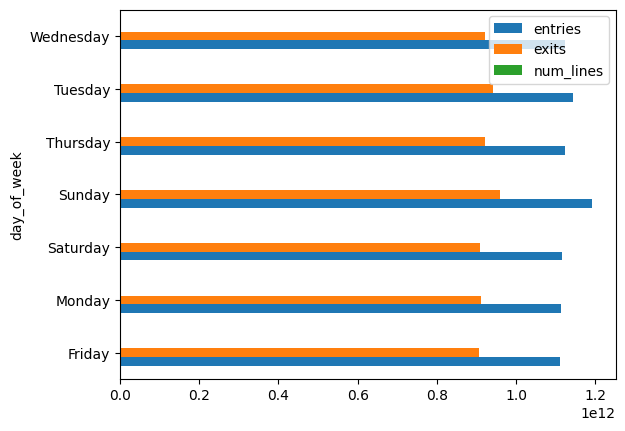

In [657]:
# Group the data by day of week and 
# plot the sum of the numeric columns
grouped = df1.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind = 'barh');

In [658]:
grouped

,entries,exits,num_lines
day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713


**Reset the index of grouped**

In [659]:
grouped = grouped.reset_index()

In [660]:
grouped

,day_of_week,entries,exits,num_lines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607
5,Tuesday,1143313287046,942230721477,77303
6,Wednesday,1123655222441,920630864687,75713


**Add a new column `is_weekend` that maps the `day_of_week` column using the dictionary weekend_map**

In [661]:
weekend_map = {
    'Monday': False,
    'Tuesday': False,
    'Wednesday': False,
    'Thursday': False,
    'Friday': False,
    'Saturday': True,
    'Sunday': True
}

In [662]:
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [663]:
grouped

,day_of_week,entries,exits,num_lines,is_weekend
0,Friday,1110224700078,906799065337,75573,False
1,Monday,1114237052454,911938153513,76110,False
2,Saturday,1115661545514,909142081474,74725,True
3,Sunday,1192306179082,959223750461,75306,True
4,Thursday,1122723988662,920691927110,76607,False
5,Tuesday,1143313287046,942230721477,77303,False
6,Wednesday,1123655222441,920630864687,75713,False


**Group the data by weekend/weekday and plot the sum of the numeric columns**


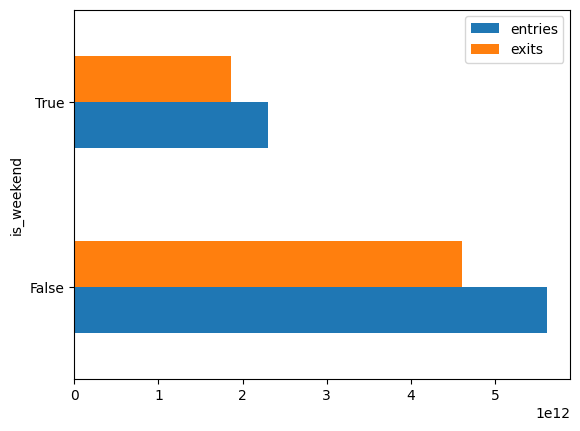

In [664]:
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind = 'barh');

How is it that the entries and exits do not tally yet everyone who enters should also get out?

And what do the exits and entries column signify?